# Machine Learning & Linear Regression
---

 - Original notebook by: Socorro Dominguez

## Agenda
1. Machine Learning
    - Supervised vs. Unsupervised Learning 
2. Supervised Learning
    - `X` and `y`
    - Regression vs. Classification    
    - The golden rule: train/test split
3. Simple Linear Regression
4. Polynomial Regression

## Machine Learning


## Definition of ML / What is ML?

Seen as a subset of AI. ML algorithms build a model based on sample data (training data), in order to make predictions without being explicitly programmed to do so.

A field of study that gives computers the ability to learn without being explicitly programmed.
– Arthur Samuel (1959)

# Types of Machine Learning: Supervised and Unsupervised

## Machine Learning: Supervised Learning
- In supervised learning, we have a set of observations (__*X*__) with an associated target (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations

 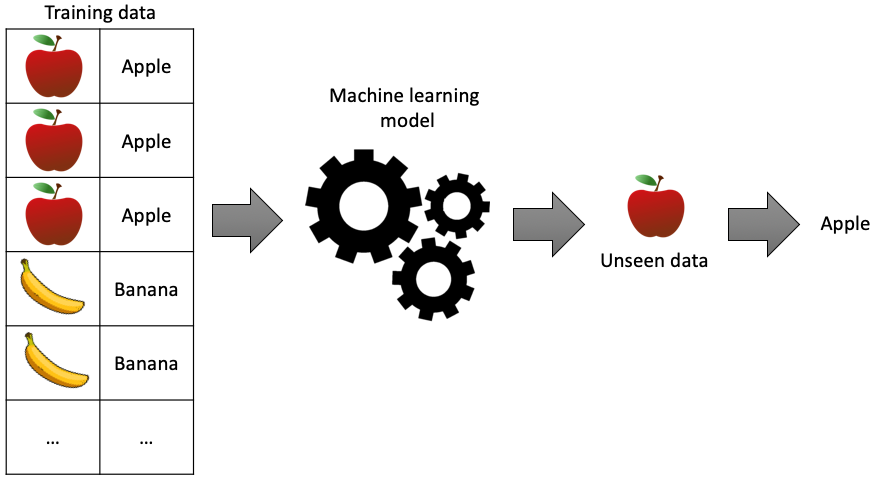

## Machine Learning: Unsupervised Learning
- We have __*X*__ (the data) but no __*y*__ (associated target)

 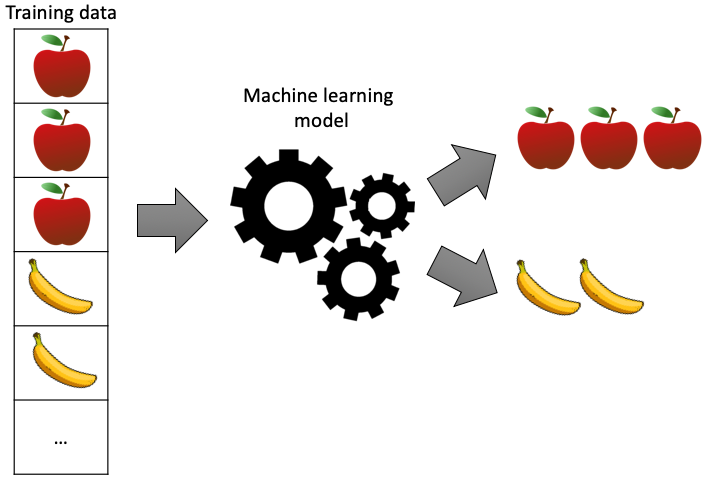

# Types of Supervised Learning: Regression and Classification

## Classification vs. Regression

* Classification problems: predicting among two or more categories, also known as classes
    - Predict whether a patient has a liver disease or not
    - Predict whether the letter grade of a student (A, B, C, D or F)
* Regression problem: predicting a continuous (in other words, a number) value
    - Predict house prices
    - Predict someone's age from their photo

## The golden rule
- When you're doing supervised learning, now that you've identified **X** and **y**
- **You need to split your data into train and test**
- **You only work with the training data**

### Why?
- As soon as you start making decisions on what features to include, drop etc., you are letting a part of the test data influence your decision-making
- Your results will not be truly representative of "unseen data"

## The big picture
- We train using the **training data**
- We test what is learned by the model on the **test data**
- We have two scores: **training** vs. **test**

### Which matters more?
- It doesn't matter how good our **training score** is because the **test score is what matters**
- Good models that generalize well though will have **similar training and testing scores**

**We want to pick models that generalize well to unseen data**

## The fundamental tradeoff 

| Model | Training Score relative to Test Score | Performance |
|:-|:-|:-|
| Too Complex|High training score compared to test score| Overfit |
|Too Simple|Low training score and low test score|Underfit|

- Models that have **extremely high training scores** (that are too good to be true) that are **highly complex** that learned very complex relationships in the training data **can be overfit**
- On the other hand, models that have **low training scores** that are **very simple** may not have learned the necessary relationships in the training data needed to predict well on unseen data; they are **underfit**

![img](https://miro.medium.com/max/2250/1*_7OPgojau8hkiPUiHoGK_w.png)

## Minimizing approximation error ...
... means that our model generalizes well


$$E_{approx} = (E_{test} - E_{train})$$

- There is generally a "trade-off" between complexity and test error
- A more complex model will fit closer to the peculiarities of the training data
    - i.e., $E_{approx}\;$ tends to get bigger as our model becomes more complex
- This means it will likely not generalise well to new data!
- $E_{approx}\;$ tends to get smaller with more data

## The fundamental tradeoff (part 2)
... In the "bias-variance" language

- **The bias error** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **The variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

## Linear Regression

- Linear regression is one of the most basic and popular ML/statistical techniques.
- Used as a predictive model
- Assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate, **y**) and the independent variable/s (input variable/s used in the prediction, **X**)

### Let's start with **simple** linear regression
- Only one independent/input variable is used to predict the dependent variable.

## Simple Linear Regression

$$\hat{y} = wx + b$$

$\hat{y}$ = Dependent variable 

$b$ = Constant 

$w$ = Coefficients

$x$ = Independent variable 

## Multiple Linear Regression
- Many $x$'s and $w$'s

$$\hat{y} = w_1x_1 + w_2x_2 + ... + b$$

- The larger the value of $w_i$, the more influence $x_i$ has on the target $\hat{y}$

## Matrix representation

- $\hat{y}$ is the linear function of features $x$ and weights $w$. 

$$\hat{y} = w^Tx + b$$
        
- $\hat{y} \rightarrow$ prediction
- $w \rightarrow$ weight vector
- $b \rightarrow$ bias
- $x \rightarrow$ features

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix} + b$$

## Matrix representation for multiple predictions

$$\hat{y} = w^TX + b$$
        

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x^{(1)}_1 & x^{(2)}_1 & \ldots &x^{(n)}_1\\ x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\ \vdots & \vdots & \ldots \\ x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d\end{bmatrix} + b$$

## Let's try it!


Let's start simple and imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

df = pd.read_csv('weight-height.csv', usecols = ['Height', 'Weight'])

df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
from sklearn.linear_model import LinearRegression

X_train_sample = df['Height'].values.reshape(-1, 1)
y_train_sample = df['Weight']

lr_sample = LinearRegression()


In [4]:
lr_sample.fit(X_train_sample, y_train_sample)

LinearRegression()

In [5]:
lr_sample.predict(X_train_sample)[:5]

array([219.16147993, 180.07254619, 221.19180859, 202.83140128,
       188.5607277 ])

In [6]:
lr_sample.coef_

array([7.71728764])

In [7]:
lr_sample.intercept_

-350.73719181213767

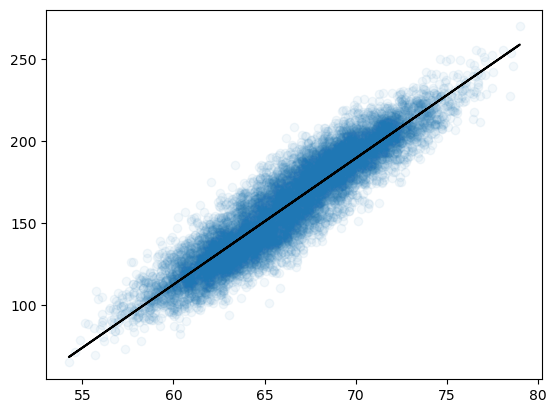

In [8]:
plt.scatter(X_train_sample, y_train_sample, alpha=0.05);
plt.plot(X_train_sample, (lr_sample.coef_*X_train_sample)+lr_sample.intercept_, c='black')

In [9]:
lr_sample.score(X_train_sample, y_train_sample)

0.8551742120609958

## Coefficients and Intercept

The intuition behind Linear Regression is in the coefficients and intercept.

Some people refer to the coefficients as weights and the intercept as the bias. The 'Weights' and 'Bias' are what is being learned during `fit`.

## Let's load the California Housing Data Set

[Documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [10]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [11]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## The golden rule
- **You need to split your data into train and test**


## So... how do we split?
- Most common way is to use `train_test_split` in `sklearn`
- Shuffles the data first and then splits it
- 80/20, 75/25, 70/30 are common splits

## Splitting out our X and y
- In this case, we are working with a regression problem. Could you say why?
- What are the features? 
- What is the target?

In [12]:
X = pd.DataFrame(california.data, columns = california.feature_names)
y = pd.DataFrame(california.target, columns = ['MedHouseVal'])

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train.shape

(16512, 8)

In [16]:
X_test.shape

(4128, 8)

In [17]:
X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])

0.8

In [18]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-9.778999e-17,-7.939386e-17,-3.262356e-17,-1.053206e-16,-3.550132e-18,-1.140345e-17,6.915226e-16,-1.134805e-14
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.770783e+00,-2.191882e+00,-1.817613e+00,-1.558363e+00,-1.244447e+00,-3.540548e-01,-1.443857e+00,-2.387300e+00
25%,-6.868704e-01,-8.427417e-01,-3.903412e-01,-1.847032e-01,-5.602992e-01,-9.353952e-02,-7.932566e-01,-1.115601e+00
50%,-1.719169e-01,3.023146e-02,-7.861158e-02,-9.694278e-02,-2.269741e-01,-3.300362e-02,-6.434780e-01,5.351153e-01
75%,4.569491e-01,6.651210e-01,2.482430e-01,7.815122e-03,2.612029e-01,3.923607e-02,9.760028e-01,7.794811e-01
max,5.833981e+00,1.855539e+00,5.408569e+01,6.735348e+01,2.997001e+01,9.263630e+01,2.960569e+00,2.619705e+00


## Training the model

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
lr_coeffs = lr.coef_
lr_coeffs

array([[ 0.82624793,  0.1171006 , -0.24891059,  0.29038746, -0.00864349,
        -0.03056429, -0.90042112, -0.87058566]])

In [23]:
lr_intercept = lr.intercept_
lr_intercept

array([2.07249896])

In [24]:
words_coeffs_df = pd.DataFrame(data = lr_coeffs.T, index = X_train.columns, columns=['Coefficients'])
words_coeffs_df

,Coefficients
MedInc,0.826248
HouseAge,0.117101
AveRooms,-0.248911
AveBedrms,0.290387
Population,-0.008643
AveOccup,-0.030564
Latitude,-0.900421
Longitude,-0.870586


Let’s try to make some sense of it here!

We can use these coefficients to interpret our model. They show us how much each of these features affects our model’s prediction.

**IMPORTANT**
In linear models:

* if the coefficient is +, then if the feature value goes UP the predicted value goes UP
* if the coefficient is -, then if the feature values goes UP the predicted value goes DOWN
* if the coefficient is 0, the feature is not used in making a prediction

## Feature Importances

In [25]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

In [26]:
results.params

x1    0.826248
x2    0.117101
x3   -0.248911
x4    0.290387
x5   -0.008643
x6   -0.030564
x7   -0.900421
x8   -0.870586
dtype: float64

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.144
Method:                 Least Squares   F-statistic:                              348.9
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:22:44   Log-Likelihood:                         -36412.
No. Observations:               16512   AIC:                                  7.284e+04
Df Residuals:                   16504   BIC:                                  7.290e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8262      0.027     30.537      0.000       0.773       0.879
x2             0.1171      0.019      6.147      0.000       0.080       0.154
x3            -0.2489      0.050     -4.948      0.000      -0.348      -0.150
x4             0.2904      0.046      6.285      0.000       0.200       0.381
x5            -0.0086      0.018     -0.474      0.636      -0.044       0.027
x6            -0.0306      0.017     -1.781      0.075      -0.064       0.003
x7            -0.9004      0.052    -17.251      0.000      -1.003      -0.798
x8            -0.8706      0.051    -16.974      0.000      -0.971      -0.770
==============================================================================
Omnibus:                     3453.723   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10941.189
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                       6.369   Cond. No.                         6.73
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
!pip install rfpimp

  Using cached rfpimp-1.3.7.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=671d74c9e380ca1dd4c596e167caa47694e723ac29b20afd2ce324a9fe512029
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\8a\42\e5\d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp


In [31]:
from rfpimp import *
import warnings
warnings.filterwarnings('ignore')

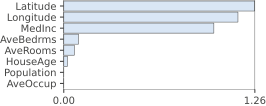

In [32]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
I = importances(lr, X_train_scaled_df, y_train)
plot_importances(I)

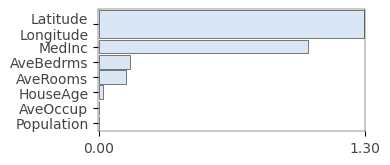

In [33]:
def showimp(model, X, y):
    features = list(X.columns)
    features.remove('Latitude')
    features.remove('Longitude')
    features += [['Latitude','Longitude']]

    I = importances(model, X, y, features=features)
    plot_importances(I)
    
showimp(lr, X_train_scaled_df, y_train)

## Predicting

In [34]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:5]

array([[ 1.44489405e-01, -5.25296884e-01,  9.13337520e-02,
        -4.22923064e-02,  1.09850539e-01,  1.78551337e-01,
        -1.42513494e+00,  1.25325150e+00],
       [ 9.98204241e-01,  2.68315039e-01,  2.67351908e-01,
        -3.44086911e-01, -1.13241081e-01, -1.48094957e-03,
        -7.97937179e-01,  7.94442248e-01],
       [ 2.47755440e-01,  3.02314620e-02,  1.97399137e-01,
        -1.42911371e-01,  1.12475146e-01, -1.86932108e-02,
         1.41597731e+00, -1.13554886e+00],
       [-7.47458513e-01,  6.65121001e-01, -1.74233123e-01,
         4.50910276e-01, -9.05872484e-01, -4.40976225e-02,
        -1.13493896e+00,  1.97637479e+00],
       [ 5.91905627e-01, -2.87213307e-01, -4.41219349e-01,
        -1.15617769e-01, -6.79281387e-01, -2.04640182e-01,
         1.01344740e+00, -1.42978523e+00]])

In [35]:
lr.predict(X_test_scaled)

array([[2.28110738],
       [2.79009128],
       [1.90332794],
       ...,
       [0.8418697 ],
       [2.7984953 ],
       [2.21779325]])

In [36]:
y_test.values

array([[1.369],
       [2.413],
       [2.007],
       ...,
       [1.286],
       [2.595],
       [1.676]])

## Prediction By Hand

In [37]:
lr.coef_

array([[ 0.82624793,  0.1171006 , -0.24891059,  0.29038746, -0.00864349,
        -0.03056429, -0.90042112, -0.87058566]])

In [38]:
lr.intercept_

array([2.07249896])

$$\hat{y} = w_1x_1 + w_2x_2 + ... + w_8x_8 + b$$

In [39]:
print(X_test_scaled[0])
(lr.coef_ * X_test_scaled[0]).sum(axis=1) + lr.intercept_


[ 0.14448941 -0.52529688  0.09133375 -0.04229231  0.10985054  0.17855134
 -1.42513494  1.2532515 ]


array([2.28110738])

## Results interpretation

- Weights (coef_)
- Bias (intercept_)

- **R-squared** measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model

**What does that mean?**

* $R^2$ is a measure of fit.  
  
* It indicates how much variation of a dependent variable is explained by the independent variables.
  
* An R-squared of 100% means that $y$ is completely explained by the independent variables.


$R^2 = 1 - \frac{Unexplained Variation}{TotalVariation}$

$R^2 = 1 - \frac{RSS}{TSS}$

$R^2	=	$   coefficient of determination    
$RSS	=	$  sum of squares of residuals   
$$RSS =\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}$$   
$TSS	=	$   total sum of squares   
$$TSS=\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$$
$\bar{y}$ = mean value

Thus, 

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}
$$

In [40]:
lr.score(X_test_scaled, y_test)

0.5943232652466202

## Understanding $R^2$

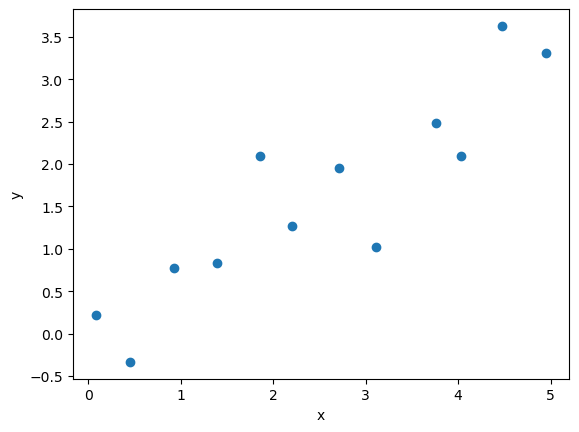

In [41]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [42]:
def make_plot(lr, x, y):
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="training data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")
    
    yhat = lr.predict(x[:,None])

    for i in range(len(y)):
        if i == 0:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red', label="residuals")
        else:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red')

    plt.legend(fontsize=12)    

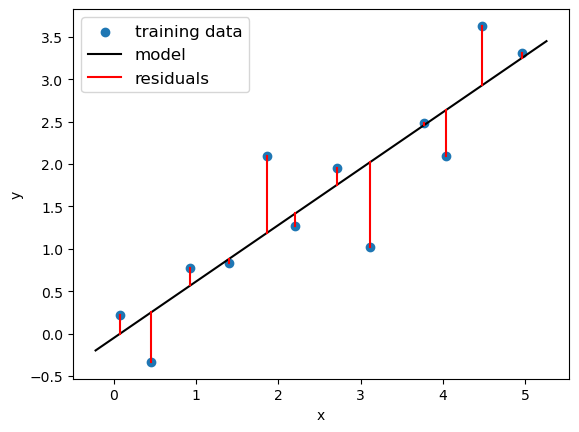

In [43]:
lr = LinearRegression()
lr.fit(X, y)
make_plot(lr, x, y)

## Polynomial regression 

### Non-linear regression motivation
- Linear regression might seem rather limited. 
- What if the true relationship between the target and the features is non-linear? 


**We still use the linear regression framework, but create quadratic, cubic etc. features**

## Let's see an example

In [44]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]

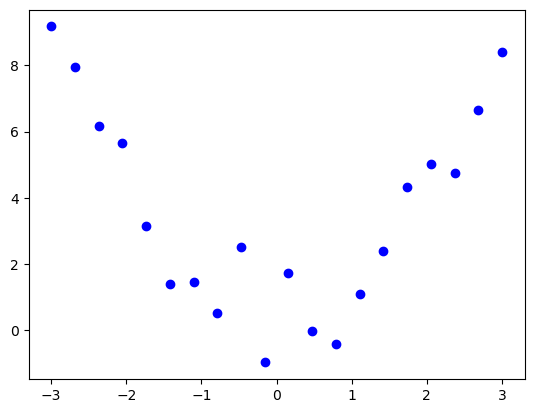

In [45]:
plt.scatter(X, y, color='blue');

## Fitting a linear regression line

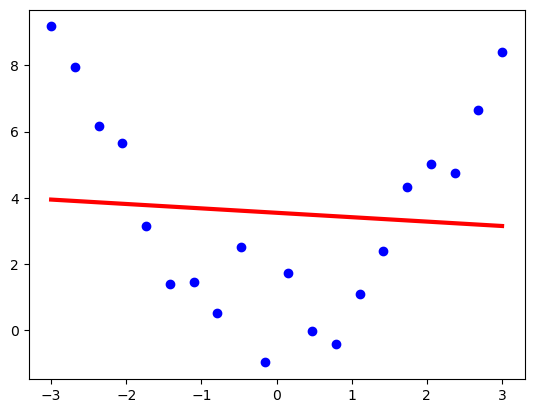

In [46]:
lr = LinearRegression()

lr.fit(X, y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3)

## Using polynomial features

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)

X_deg = poly_feats.fit_transform(X)

X_poly_feat_names = poly_feats.get_feature_names(['x'+ str(i) for i in range(1,deg)])

df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y


In [49]:
df_poly.head()

,1,x1,x1^2,y
0,1.0,-3.000000,9.000000,9.176737
1,1.0,-2.684211,7.204986,7.955820
2,1.0,-2.368421,5.609418,6.163608
3,1.0,-2.052632,4.213296,5.648976
4,1.0,-1.736842,3.016620,3.150708


## Fitting polynomial features


What sklearn does is - If you substitute $x^2$ as another variable such as `m`, then the equation now is:

`y=w*m + b`  

The relation between `y` and `m` is linear but it is not linear between `x` and `y`. 

Because of this "technically", it is linear regression just the variables between which it happens is $x^2$ (`m`) and `y` and not `x` and `y`.

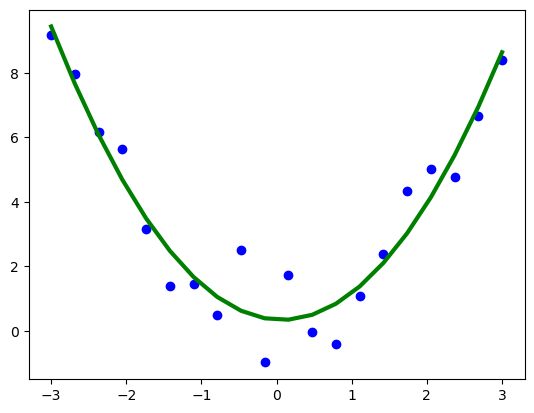

In [50]:
lr_poly = LinearRegression()

lr_poly.fit(X_deg, y)

preds = lr_poly.predict(X_deg)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);

In [51]:
lr_poly.coef_

array([[ 0.        , -0.13309973,  0.9654656 ]])

In [52]:
lr_poly.intercept_

array([0.34417333])